<a href="https://colab.research.google.com/github/prabhupanda/OpenCV_practice/blob/main/Copy_of_Image_manipulation_assign_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

In [10]:
threat_file='/content/BAGGAGE_20170522_113049_80428_A.jpg'
baggage_file='/content/BAGGAGE_20180811_175323_83216_B_1.jpg'

bag_image=cv.imread(baggage_file)
threat_image=cv.imread(threat_file)

In [3]:
#function for image rotation
def rotate(image,angle):
    dimensions=(image.shape[1],image.shape[0])
    rotation_matrix=cv.getRotationMatrix2D((image.shape[1]//2,image.shape[0]//2),angle,scale=1)
    rotate_image=cv.warpAffine(image,rotation_matrix,dimensions)
    return rotate_image

In [11]:
#creating a mask for the threat image
def transform_mask(img,resize_factor,lower_limit=230,upper_limit=255):
    #resizing the image
    image_res=cv.resize(img,(0,0),fx=resize_factor,fy=resize_factor)
    
    lower_limit=np.array([230,230,230])
    upper_limit=np.array([255,255,255])
    mask=cv.inRange(image_res,lower_limit,upper_limit)
    #invert the colours of mask#
    mask_invert=(255-mask)
    return image_res,mask_invert
    

In [12]:
#rotate_img=rotate(threat_image,angle=-45)

image_resized,mask=transform_mask(threat_image,resize_factor=0.3)
cv.imwrite('resized_img.png',image_resized)
cv.imwrite('mask.png',mask)

True

In [15]:
#importing the images in PIL.Image format
bag=Image.open(baggage_file)
threat=Image.open('/content/resized_img.png')
##masked_filter also imported by PIL.Image 
mask_filter=Image.open('/content/mask.png')


#rotating the image & mask by 45 degrees
threat=threat.rotate(-45)
mask_filter=mask_filter.rotate(-45)
#Pasting the threat_image on baggage_image
Image.Image.paste(bag,threat,mask_filter)


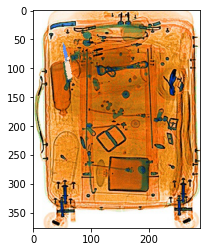

In [16]:
plt.imshow(bag)

Adding Translucency to Image

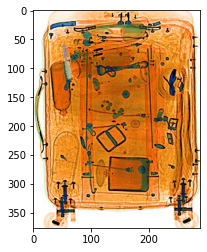

In [17]:
#Add an aplha channel of the edited bag over original baggage for translucency effects

bag_copy=Image.open(baggage_file)
im3=Image.blend(bag_copy,bag,0.6)
plt.imshow(im3)
plt.show()

2nd Image set

In [18]:
bag2=cv.imread('/content/BAGGAGE_20180811_175328_83216_A_1.jpg')
threat2=cv.imread('/content/BAGGAGE_20170523_085803_80428_D.jpg')

In [35]:
resized_threat2,mask2=transform_mask(threat2,0.3)
cv.imwrite('threat_2.png',resized_threat2)
cv.imwrite('mask2.png',mask2)

True

In [47]:
#importing again in PIL.Image format
bag2=Image.open('/content/BAGGAGE_20180811_175328_83216_A_1.jpg')
threat_2=Image.open('/content/threat_2.png')
mask_2=Image.open('/content/mask2.png')
#Rotate the threat_images
threat_2=threat_2.rotate(-45)
mask_2=mask_2.rotate(-45)

#paste 2 images together

Image.Image.paste(bag2,threat_2,(150,-50),mask_2)



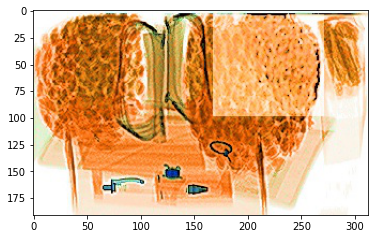

In [48]:
plt.imshow(bag2)
plt.show()